In [18]:
# The script MUST contain a function named azureml_main
# which is the entry point for this module.

# imports up here can be used to 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from azureml import Workspace
ws = Workspace(
    workspace_id='cdfdf6656efc418e970f487e4e5ba13b',
    authorization_token='UhaIFoa7sIwOlJWduh82L0R/OqpRrc/cFCnxTS5rffCyY8y3gaJGFwPtn2XDnKhePIua6xwrmmRj8ea6/opkeA==',
    endpoint='https://studioapi.azureml.net'
)
experiment = ws.experiments['cdfdf6656efc418e970f487e4e5ba13b.f-id.78b1116bc1b64ae88fa7c8a68f2e886e']
ds = experiment.get_intermediate_dataset(
    node_id='c69bc91d-7b3a-4837-b5b5-b0ae950dce09-16656',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [21]:
%matplotlib inline
df = frame

In [28]:
frame.head()

,spl length,spl width,ptl length,ptl width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
print(df['Class'].unique())
print(df['Class'].value_counts())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' nan]
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64


In [88]:
print(df['spl length'].head())

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: spl length, dtype: float64


In [203]:
dfmod = df

In [204]:
#Going to change the names on the columns/indices
dfmod = dfmod.rename(columns={'spl length':'spln', 'spl width':'spwd','ptl length':'ptln','ptl width':'ptwd', 'Class':'class'})


In [205]:
dfmod.head(2)

,spln,spwd,ptln,ptwd,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [234]:
#remove the Iris- from class

dfmod['class'] = dfmod['class'].str.replace('Iris-','')

#removethe 1 NAN row
dfmod = dfmod.dropna()

dfmod.head()


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,spln,spwd,ptln,ptwd,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


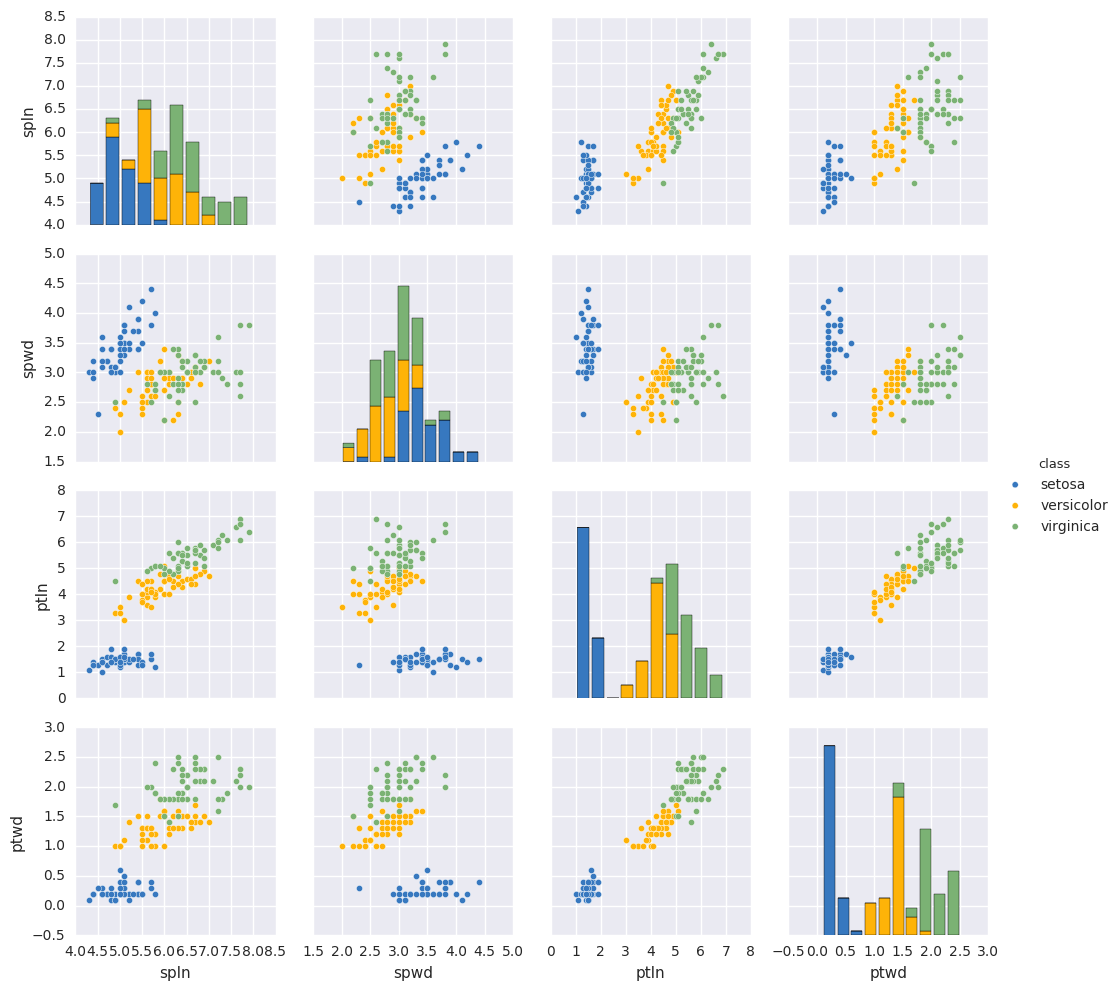

In [225]:
#fig = plt.Figure()    #Set Canvas
#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.pairplot(dfmod,hue='class',palette=sns.xkcd_palette(colors))

In [235]:
#going to normalize the data..
from scipy import stats

namelist = ['spln','spwd','ptln','ptwd']

dfmodZ = dfmod

dfmodZ.head(2)





,spln,spwd,ptln,ptwd,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [240]:
##print(dfmodZ[[0]].head(2))
#print(stats.zscore(dfmodZ[[0]]))
##dfmodZ[['spln']].head(4)

for nm in namelist:
    dfmodZ[[nm]] = stats.zscore(dfmodZ[[nm]])

dfmodZ.head()
#That's it.    

       spln
0 -0.900681
1 -1.143017


,spln,spwd,ptln,ptwd,class
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa


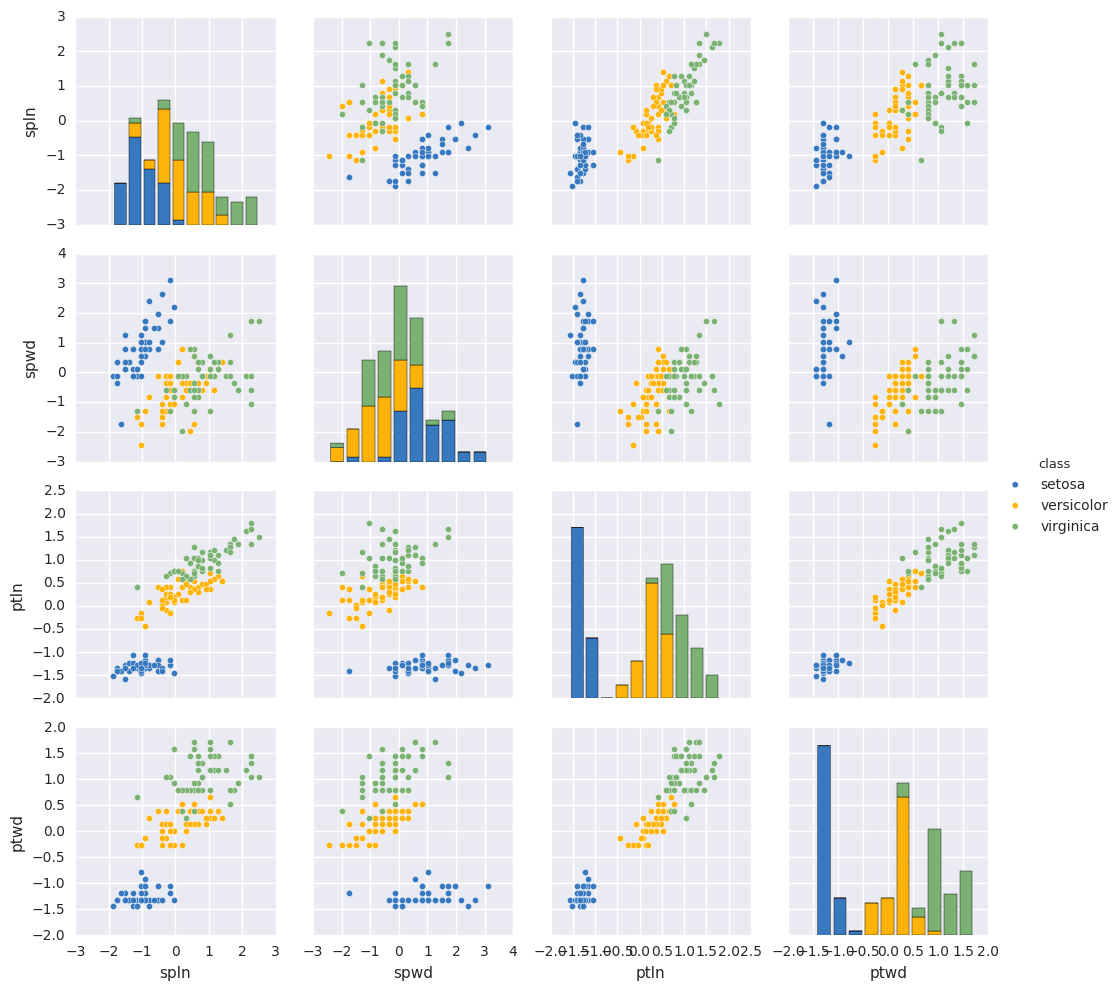

In [241]:
#fig = plt.Figure()    #Set Canvas
#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.pairplot(dfmodZ,hue='class',palette=sns.xkcd_palette(colors))

# This is clearly linearly separable between setosa and the other two... 
The versicolor and virginica are less obvious. What kind of options do we have?

Log Regression
Boosted Trees
Forests
SVM (with a kernel to pop things out a bit)
Adding Extra, nonlinear features
Quitting and getting some lunch





In [252]:
print(dfmod.head(2))
dfa = dfmod[dfmod['class']!='setosa']
print(dfa.head())
print(dfa['class'].value_counts())

       spln      spwd      ptln      ptwd   class
0 -0.900681  1.032057 -1.341272 -1.312977  setosa
1 -1.143017 -0.124958 -1.341272 -1.312977  setosa
        spln      spwd      ptln      ptwd       class
50  1.401508  0.337848  0.535296  0.264699  versicolor
51  0.674501  0.337848  0.421564  0.396172  versicolor
52  1.280340  0.106445  0.649027  0.396172  versicolor
53 -0.416010 -1.744778  0.137236  0.133226  versicolor
54  0.795669 -0.587764  0.478430  0.396172  versicolor
virginica     50
versicolor    50
Name: class, dtype: int64
